# Emotion Detection
#importing libraries

In [44]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random 
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print('Tensorflow version:',tf.__version__)


Tensorflow version: 2.15.0


**Exploring dataset

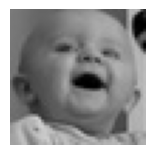

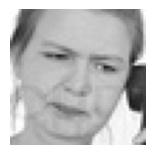

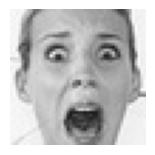

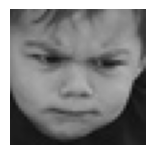

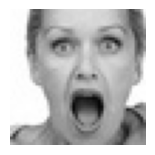

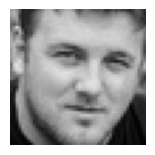

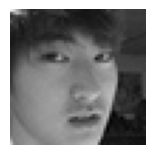

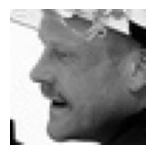

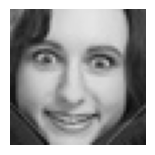

In [45]:
images=glob('train/**/**')
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(15,6))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

PREPARING DATA TO TRAIN


In [46]:
img_size=48
batch_size=64
datagen_train=ImageDataGenerator()
train_generator=datagen_train.flow_from_directory("train/",target_size=(img_size,img_size), 
                                                  color_mode= "grayscale", batch_size=batch_size,
                                                  class_mode="categorical", shuffle= True)

validation_generator=ImageDataGenerator()
validation_generator=datagen_train.flow_from_directory("test/",target_size=(img_size,img_size), 
                                                  color_mode= "grayscale", batch_size=batch_size,
                                                  class_mode="categorical", shuffle= True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


DEFINING MODEL

In [47]:
def Convolution(input_tensor, filters, kernel_size):     #to find features
    x= Conv2D(filters= filters, kernel_size= kernel_size, padding= "same")(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    
    return x

In [48]:
def Dense_f(input_tensor, nodes):
    x= Dense(nodes)(input_tensor)
    x= BatchNormalization()(x)
    x= Activation('relu')(x)
    x= Dropout(0.25)(x)
    
    return x

In [49]:
def model_fer(input_shape):
    inputs=Input(input_shape)
    conv_1=Convolution(inputs,32,(3,3))
    conv_2=Convolution(inputs,64,(5,5))
    conv_3=Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1=Dense_f(flatten, 256)
    
    output= Dense(7,activation='softmax')(dense_1)
    
    model=Model(inputs=[inputs],outputs=[output])
    
    model.compile(loss=['categorical_crossentropy'], optimizer= 'adam', metrics=['accuracy'])
    
    return model

In [50]:
model= model_fer((48,48,1))
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_14 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_14 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 128)       0   

INITIALIZING THE MODEL

In [51]:
epochs = 15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps= validation_generator.n//validation_generator.batch_size

checkpoint= ModelCheckpoint('model_weights.h5',monitor= 'val_accuracy', save_weights_only= True, mode='max',
                           verbose=1)
callbacks=[checkpoint]

TRAINING THE MODEL

In [52]:
history=model.fit(
x= train_generator,
steps_per_epoch= steps_per_epoch,
epochs=epochs,
validation_data= validation_generator,
validation_steps= validation_steps,
callbacks= callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6430 - accuracy: 0.3764
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 442s 983ms/step - loss: 1.6430 - accuracy: 0.3764 - val_loss: 1.5902 - val_accuracy: 0.3938
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3438 - accuracy: 0.4898
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 109s 243ms/step - loss: 1.3438 - accuracy: 0.4898 - val_loss: 1.4629 - val_accuracy: 0.4372
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1833 - accuracy: 0.5571
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 124s 278ms/step - loss: 1.1833 - accuracy: 0.5571 - val_loss: 1.4981 - val_accuracy: 0.4213
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0563 - accuracy: 0.6094
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 

MODEL EVALUATION

In [53]:
model.evaluate(validation_generator)

113/113 [==============================] - 5s 44ms/step - loss: 1.8552 - accuracy: 0.5116


[1.855196475982666, 0.5115631222724915]

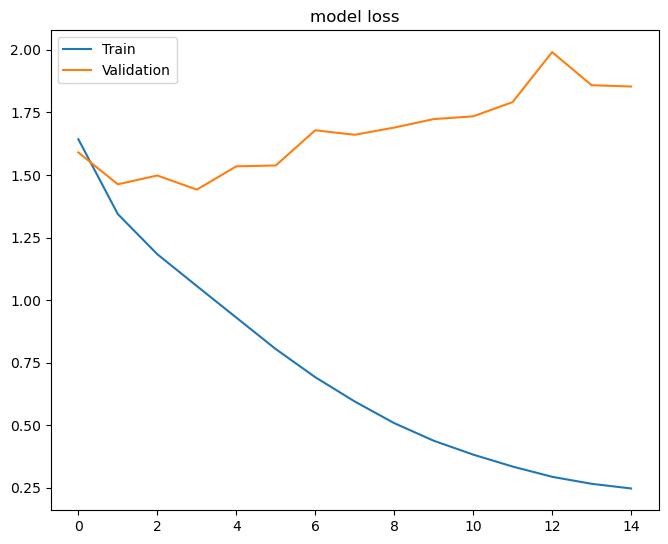

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

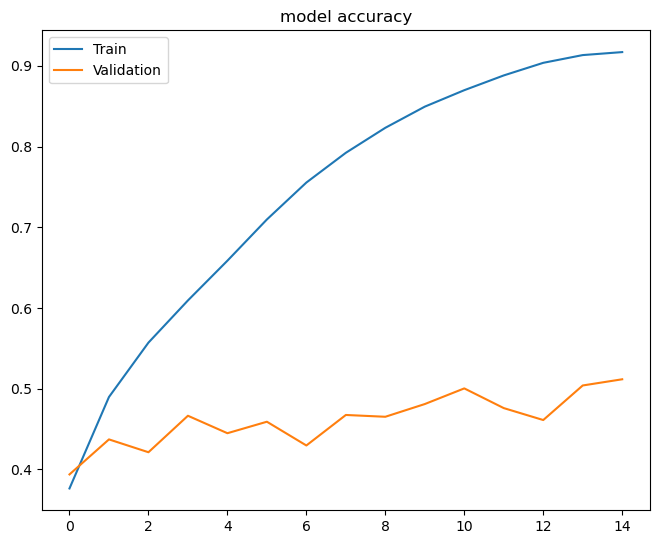

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0, bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

SAVING MODEL

In [57]:
model_json=model.to_json()
with open('model_a.json',"w") as json_file:
    json_file.write(model_json)